In [11]:
import yfinance as yf
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#загрузка данных S&P 500
data = yf.download('^GSPC', start = '2018-01-01', end = '2024-12-31')




/var/folders/vw/h7bf5v_11rd1p1kyk3khk1dm0000gn/T/ipykernel_38278/151046491.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('^GSPC', start = '2018-01-01', end = '2024-12-31')
[*********************100%***********************]  1 of 1 completed


Размерность данных: (1760, 5)

Первые 5 строк:
Price             Close         High          Low         Open      Volume
Date                                                                      
2018-01-02  2695.810059  2695.889893  2682.360107  2683.729980  3397430000
2018-01-03  2713.060059  2714.370117  2697.770020  2697.850098  3544030000
2018-01-04  2723.989990  2729.290039  2719.070068  2719.310059  3697340000
2018-01-05  2743.149902  2743.449951  2727.919922  2731.330078  3239280000
2018-01-08  2747.709961  2748.510010  2737.600098  2742.669922  3246160000

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1760 entries, 2018-01-02 to 2024-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1760 non-null   float64
 1   High    1760 non-null   float64
 2   Low     1760 non-null   float64
 3   Open    1760 non-null   float64
 4   Volume  1760 non-null   int64  
dtypes: float64(4), int

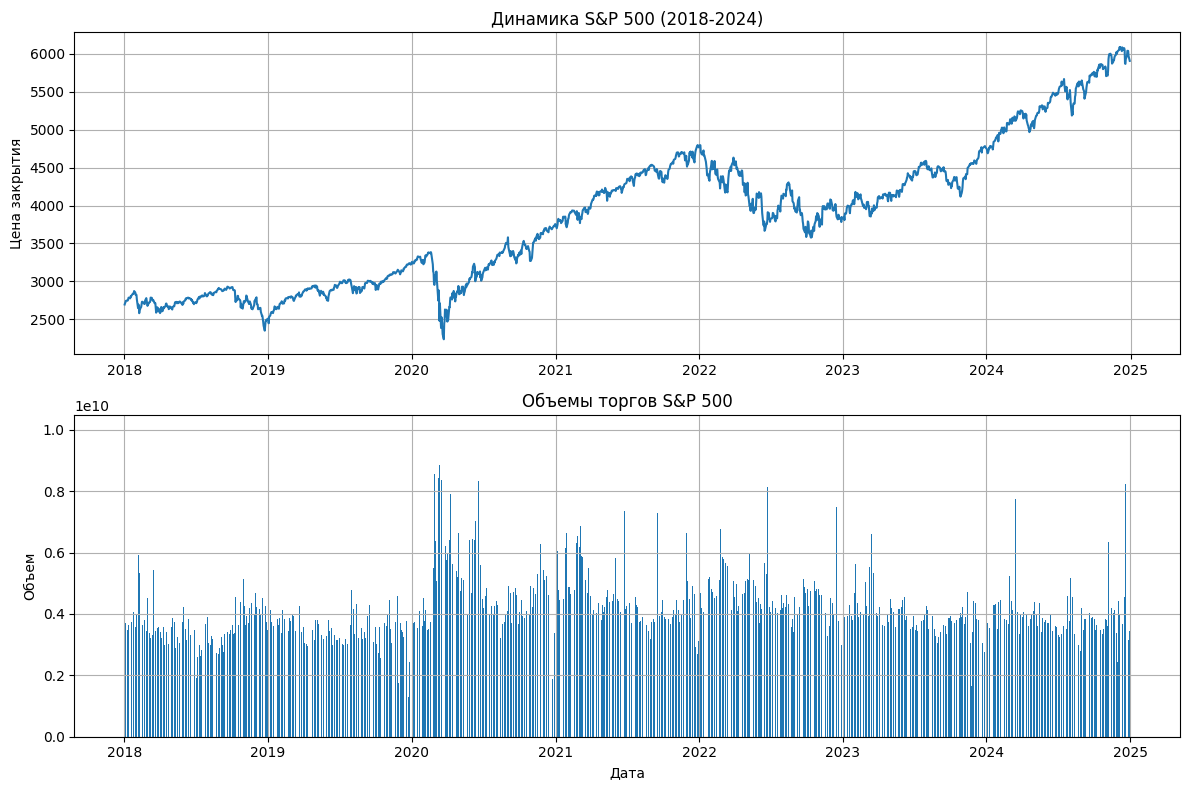

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2908: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/numpy/lib/_function_base_impl.py:2913: RuntimeWarning: invalid value encountered in dot
  c = dot(X, X_T.conj())


Корреляция между изменениями цен и объемов: nan
Папка reports создана или уже существует


<Figure size 640x480 with 0 Axes>

In [ ]:
# Проверим структуру данных
print("Размерность данных:", data.shape)
print("\nПервые 5 строк:")
print(data.head())
print("\nИнформация о данных:")
print(data.info())

# Посмотрим на структуру столбцов
print("\nСтолбцы данных:")
print(data.columns)

# Анализ объемов торгов
plt.figure(figsize=(12, 8))

# Варианты обращения к данным в зависимости от структуры:
if isinstance(data.columns, pd.MultiIndex):
    # Если многоуровневые столбцы
    plt.subplot(2, 1, 1)
    plt.plot(data[('Close', '^GSPC')])
    plt.title('Динамика S&P 500 (2018-2024)')
    plt.ylabel('Цена закрытия')
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.bar(data.index, data[('Volume', '^GSPC')])
    plt.title('Объемы торгов S&P 500')
    plt.xlabel('Дата')
    plt.ylabel('Объем')
    plt.grid(True)
else:
    # Если обычные столбцы
    plt.subplot(2, 1, 1)
    plt.plot(data['Close'])
    plt.title('Динамика S&P 500 (2018-2024)')
    plt.ylabel('Цена закрытия')
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.bar(data.index, data['Volume'])
    plt.title('Объемы торгов S&P 500')
    plt.xlabel('Дата')
    plt.ylabel('Объем')
    plt.grid(True)

plt.tight_layout()
plt.show()

# Корреляция между изменениями цен и объемами
if isinstance(data.columns, pd.MultiIndex):
    price_changes = data[('Close', '^GSPC')].pct_change()
    volume_changes = data[('Volume', '^GSPC')].pct_change()
else:
    price_changes = data['Close'].pct_change()
    volume_changes = data['Volume'].pct_change()

correlation = price_changes.corr(volume_changes)
print(f"Корреляция между изменениями цен и объемов: {correlation:.4f}")

import os

# Создаем папку reports
os.makedirs('../reports', exist_ok=True)
print("Папка reports")

plt.savefig('../reports/example_plot.png', bbox_inches='tight', dpi=300)


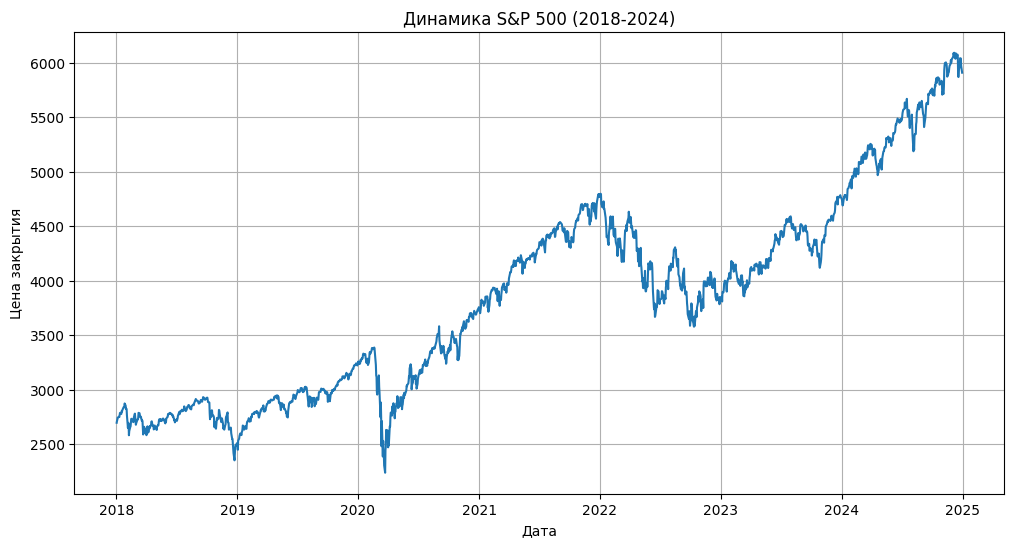

In [15]:
# Упрощаем структуру столбцов
data.columns = data.columns.droplevel(1)

# Визуализируем динамику цен закрытия
plt.figure(figsize=(12, 6))
plt.plot(data['Close'])
plt.title('Динамика S&P 500 (2018-2024)')
plt.xlabel('Дата')
plt.ylabel('Цена закрытия')
plt.grid(True)
plt.show()









In [19]:
# Расчет ежедневных логарифмических доходностей (более точный метод)
returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()

# Базовая статистика доходностей
print("=== АНАЛИЗ ДОХОДНОСТЕЙ S&P 500 ===")
print(f"Период анализа: {returns.index[0].date()} - {returns.index[-1].date()}")
print(f"Общее количество дней: {len(returns)}")
print(f"Среднедневная доходность: {returns.mean():.6f}")
print(f"Волатильность (стандартное отклонение): {returns.std():.6f}")
print(f"Максимальный рост за день: {returns.max():.4f}")
print(f"Максимальное падение за день: {returns.min():.4f}")
print(f"Квартили распределения:\n{returns.quantile([0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99])}")

# Анализ убыточных дней
negative_returns = returns[returns < 0]
print(f"Количество убыточных дней: {len(negative_returns)} ({len(negative_returns) / len(returns)*100:.1f}%)")

=== АНАЛИЗ ДОХОДНОСТЕЙ S&P 500 ===
Период анализа: 2018-01-03 - 2024-12-30
Общее количество дней: 1759
Среднедневная доходность: 0.000446
Волатильность (стандартное отклонение): 0.012476
Максимальный рост за день: 0.0897
Максимальное падение за день: -0.1277
Квартили распределения:
0.01   -0.035034
0.05   -0.018645
0.25   -0.004611
0.50    0.000881
0.75    0.006747
0.95    0.016496
0.99    0.029711
Name: Close, dtype: float64
Количество убыточных дней: 802 (45.6%)


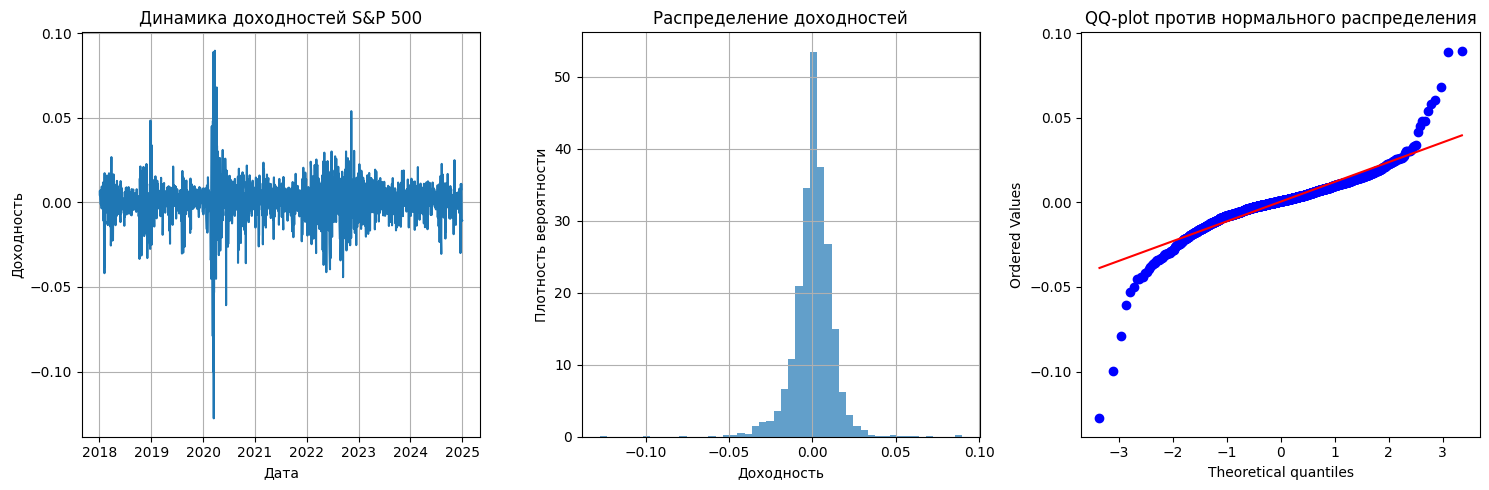

In [20]:
# График распределения доходностей
plt.figure(figsize=(15, 5))

# График временного ряда доходностей
plt.subplot(1, 3, 1)
plt.plot(returns)
plt.title('Динамика доходностей S&P 500')
plt.xlabel('Дата')
plt.ylabel('Доходность')
plt.grid(True)

# Гистограмма распределения
plt.subplot(1, 3, 2)
plt.hist(returns, bins=50, alpha=0.7, density=True)
plt.title('Распределение доходностей')
plt.xlabel('Доходность')
plt.ylabel('Плотность вероятности')
plt.grid(True)

# QQ-plot для сравнения с нормальным распределением
plt.subplot(1, 3, 3)
from scipy import stats
stats.probplot(returns, dist="norm", plot=plt)
plt.title('QQ-plot против нормального распределения')

plt.tight_layout()
plt.show()

In [22]:
# Расчет Value at Risk (VaR) разными методами
confidence_level = 0.95  # 95% доверительный уровень

# Исторический VaR
historical_var = np.percentile(returns, (1 - confidence_level) * 100)

# Параметрический VaR (предполагая нормальное распределение)
parametric_var = stats.norm.ppf(1 - confidence_level, returns.mean(), returns.std())

print("=== VALUE AT RISK (VaR) АНАЛИЗ ===")
print(f"Исторический VaR ({confidence_level*100}% дов. ур.): {historical_var:.4f}")
print(f"Параметрический VaR ({confidence_level*100}% дов. ур.): {parametric_var:.4f}")

# Проверка точности VaR
var_violations = returns < historical_var
var_violation_rate = var_violations.sum() / len(returns)
print(f"Фактическая частота нарушений VaR: {var_violation_rate:.4f} (ожидалось:  {1-confidence_level:.3f})")

=== VALUE AT RISK (VaR) АНАЛИЗ ===
Исторический VaR (95.0% дов. ур.): -0.0186
Параметрический VaR (95.0% дов. ур.): -0.0201
Фактическая частота нарушений VaR: 0.0500 (ожидалось:  0.050)


=== EXPECTED SHORTFALL (CVaR) АНАЛИЗ ===
Historical VaR (95.0%): -0.0186
Expected Shortfall (95.0%): -0.0309
Соотношение CVaR/VaR: 1.66


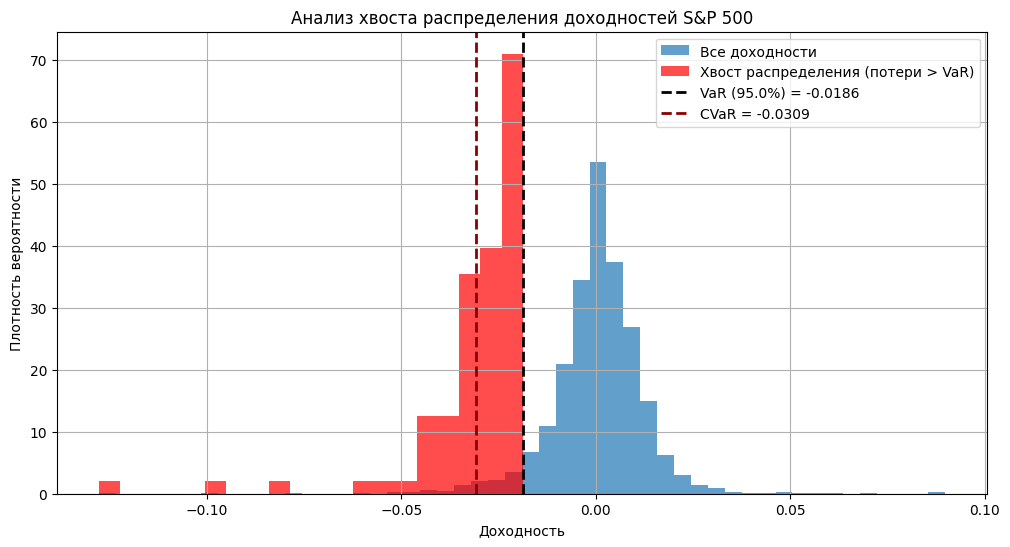


ЭКСТРЕМАЛЬНЫЕ СОБЫТИЯ (1% худших дней):
Количество экстремальных дней: 18
Средние потери в экстремальные дни: -0.0531
Максимальные потери: -0.1277
Даты крупнейших падений:
  2020-03-16: -0.1277
  2020-03-12: -0.0999
  2020-03-09: -0.0790
  2020-06-11: -0.0608
  2020-03-18: -0.0532


In [ ]:
# Расчет Expected Shortfall (CVaR) - более консервативная мера риска
confidence_level = 0.95  # 95% доверительный уровень

# Исторический Expected Shortfall (усредненные потери beyond VaR)
tail_returns = returns[returns <= historical_var]
cvar = tail_returns.mean()

print("=== EXPECTED SHORTFALL (CVaR) АНАЛИЗ ===")
print(f"Historical VaR ({confidence_level*100}%): {historical_var:.4f}")
print(f"Expected Shortfall ({confidence_level*100}%): {cvar:.4f}")
print(f"Соотношение CVaR/VaR: {abs(cvar/historical_var):.2f}")

# Визуализация хвоста распределения
plt.figure(figsize=(12, 6))

# Гистограмма с выделением хвоста
plt.hist(returns, bins=50, alpha=0.7, density=True, label='Все доходности')
plt.hist(tail_returns, bins=20, alpha=0.7, density=True, color='red', label='Хвост распределения (потери > VaR)')
plt.axvline(historical_var, color='black', linestyle='--', linewidth=2, label=f'VaR ({confidence_level*100}%) = {historical_var:.4f}')
plt.axvline(cvar, color='darkred', linestyle='--', linewidth=2, label=f'CVaR = {cvar:.4f}')

plt.title('Анализ хвоста распределения доходностей S&P 500')
plt.xlabel('Доходность')
plt.ylabel('Плотность вероятности')
plt.legend()
plt.grid(True)
plt.show()

#Анализ экстремальных событий
extreme_events = returns[returns <= returns.quantile(0.01)]  # 1% худших дней
print(f"\nЭКСТРЕМАЛЬНЫЕ СОБЫТИЯ (1% худших дней):")
print(f"Количество экстремальных дней: {len(extreme_events)}")
print(f"Средние потери в экстремальные дни: {extreme_events.mean():.4f}")
print(f"Максимальные потери: {extreme_events.min():.4f}")
print(f"Даты крупнейших падений:")
for date, loss in extreme_events.nsmallest(5).items():
    print(f"  {date.date()}: {loss:.4f}")

In [33]:
# Выделяем хвост распределения (5% худших доходностей)
threshold = returns.quantile(0.05)
exceedances = threshold - returns[returns <= threshold]  # Превышения над порогом

# Альтернативный метод оценки параметров GPD (метод моментов)
mean_exceed = exceedances.mean()
var_exceed = exceedances.var()

# Проверяем, достаточно ли данных для оценки
if len(exceedances) < 20:
    print("Предупреждение: недостаточно данных для надежной оценки параметров GPD")
    print(f"Количество превышений порога: {len(exceedances)}")
    # Можно попробовать увеличить порог до 7% или 10%
    threshold = returns.quantile(0.07)
    exceedances = threshold - returns[returns <= threshold]
    mean_exceed = exceedances.mean()
    var_exceed = exceedances.var()

# Метод моментов для оценки параметров GPD
if var_exceed > 0:
    xi = 0.5 * (1 - (mean_exceed**2 / var_exceed))
    sigma = 0.5 * mean_exceed * (1 + (mean_exceed**2 / var_exceed))
else:
    # Если дисперсия равна 0, используем эвристические значения
    xi = 0.2  # Типичное значение для финансовых данных
    sigma = mean_exceed * (1 - xi)  # Сохраняем соответствие среднему

print("Параметры GPD распределения (метод моментов):")
print(f"Shape parameter (ξ): {xi:.4f}")
print(f"Scale parameter (σ): {sigma:.4f}")

# Интерпретация параметров:
if xi > 0:
    print("ξ > 0: Подтверждается наличие тяжелых хвостов")
elif xi == 0:
    print("ξ = 0: Экспоненциальные хвосты")
else:
    print("ξ < 0: Короткие хвосты (редко для финансовых данных)")

# Дополнительная диагностика
print(f"\nДиагностика:")
print(f"Порог: {threshold:.6f}")
print(f"Количество превышений: {len(exceedances)}")
print(f"Среднее превышение: {mean_exceed:.6f}")
print(f"Дисперсия превышений: {var_exceed:.6f}")

Параметры GPD распределения (метод моментов):
Shape parameter (ξ): 0.2188
Scale parameter (σ): 0.0096
ξ > 0: Подтверждается наличие тяжелых хвостов

Диагностика:
Порог: -0.018645
Количество превышений: 88
Среднее превышение: 0.012263
Дисперсия превышений: 0.000267


In [38]:
# Переход к положительным убыткам
losses = -returns

# Порог для убытков (95% квантиль)
threshold_losses = losses.quantile(0.95)
exceedances = losses[losses > threshold_losses] - threshold_losses

# Параметры GPD методом моментов
mean_exceed = exceedances.mean()
var_exceed = exceedances.var()

if var_exceed > mean_exceed**2:
    xi_mom = 0.5 * (1 - (mean_exceed**2 / var_exceed))
    sigma_mom = 0.5 * mean_exceed * (1 + (mean_exceed**2 / var_exceed))
else:
    xi_mom = 0.1
    sigma_mom = mean_exceed * (1 - xi_mom)

# EVT VaR для убытков
n = len(losses)
nu = len(exceedances)
evt_var_losses = threshold_losses + (sigma_mom/xi_mom) * ((((1-alpha)*n)/nu)**(-xi_mom) - 1)

# EVT CVaR для убытков
evt_cvar_losses = evt_var_losses + (sigma_mom + xi_mom * (evt_var_losses - threshold_losses)) / (1 - xi_mom)

# Преобразование обратно в доходности
evt_var_mom = -evt_var_losses
evt_cvar_mom = -evt_cvar_losses

# Вывод результатов
print(f"Параметры GPD (метод моментов):")
print(f"Shape parameter (ξ): {xi_mom:.6f}")
print(f"Scale parameter (σ): {sigma_mom:.6f}")
print(f"\nEVT VaR ({alpha*100}%): {evt_var_mom:.6f}")
print(f"EVT CVaR ({alpha*100}%): {evt_cvar_mom:.6f}")

# Сравнение методов
print("\nСРАВНЕНИЕ МЕТОДОВ ОЦЕНКИ РИСКА:")
print(f"Historical VaR: {historical_var:.6f}")
print(f"Parametric VaR: {parametric_var:.6f}")
print(f"EVT VaR (MOM): {evt_var_mom:.6f}")
print(f"EVT CVaR (MOM): {evt_cvar_mom:.6f}")
print(f"Historical CVaR: {cvar:.6f}")


Параметры GPD (метод моментов):
Shape parameter (ξ): 0.218837
Scale parameter (σ): 0.009579

EVT VaR (95.0%): -0.018651
EVT CVaR (95.0%): -0.030915

СРАВНЕНИЕ МЕТОДОВ ОЦЕНКИ РИСКА:
Historical VaR: -0.018645
Parametric VaR: -0.020075
EVT VaR (MOM): -0.018651
EVT CVaR (MOM): -0.030915
Historical CVaR: -0.030908


In [ ]:
# Сохранение обработанных данных
import os

# папка data
os.makedirs('../../data', exist_ok=True)

# Сохранение данных
returns.to_csv('../../data/processed_returns.csv')
print("Данные сохранены в data/processed_returns.csv")

Данные сохранены в data/processed_returns.csv
